In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', None)         

artifacts = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/artifacts.csv")
artifact_release = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/artifact_release.csv")
release = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/releases.csv")
# added_values = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/added_values.csv")
# dependency = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/dependencies.csv")

In [2]:
artifact_release['artifact_id'].nunique()

635003

In [3]:
release['release_timestamp'] = pd.to_datetime(release['release_timestamp'], unit='ms')


In [4]:
# Merge artifacts with their releases
artifact_releases = pd.merge(artifact_release, release, on='release_id', how='inner')
artifact_releases = pd.merge(artifact_releases, artifacts[['artifact_id']], on='artifact_id', how='inner')

In [5]:
# Define the date range
start_date = '2014-09-04'
end_date = '2024-09-04'

# Filter the release history to include only records within 2014-2024
filtered_release_history = artifact_releases[
    (artifact_releases['release_timestamp'] >= start_date) &
    (artifact_releases['release_timestamp'] <= end_date)
]
filtered_release_history = filtered_release_history.sort_values(by=['artifact_id', 'release_timestamp'])
filtered_release_history

,artifact_id,release_id,release_version,release_timestamp
13237446,abbot:abbot,abbot:abbot:1.4.0,1.4.0,2015-09-22 15:54:01
10918348,abbot:costello,abbot:costello:1.4.0,1.4.0,2015-09-24 09:21:46
12701068,academy.alex:custommatcher,academy.alex:custommatcher:1.0,1.0,2018-05-31 18:57:25
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22
...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50


In [6]:
filtered_release_history['artifact_id'].nunique()

581424

In [7]:

# Group by artifact_id and get the first and last release date per project
release_date_range = filtered_release_history.groupby('artifact_id')['release_timestamp'].agg(['min', 'max'])
# Group by artifact_id and get the first and last release date per project
release_date_range = filtered_release_history.groupby('artifact_id')['release_timestamp'].agg(['min', 'max'])

# Filter to include only projects with both first and last release dates within 2014-2024
valid_projects = release_date_range[
    (release_date_range['min'] >= start_date) &
    (release_date_range['max'] <= end_date)
].index

# Filter the original dataframe to include only valid projects
filtered_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(valid_projects)]
filtered_release_history

,artifact_id,release_id,release_version,release_timestamp
13237446,abbot:abbot,abbot:abbot:1.4.0,1.4.0,2015-09-22 15:54:01
10918348,abbot:costello,abbot:costello:1.4.0,1.4.0,2015-09-24 09:21:46
12701068,academy.alex:custommatcher,academy.alex:custommatcher:1.0,1.0,2018-05-31 18:57:25
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22
...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50


In [8]:
filtered_release_history['artifact_id'].nunique()

581424

In [9]:
new_project_cutoff = pd.to_datetime('2023-08-30')


# Group by artifact_id to get the first and last release dates and count of releases per project
release_date_range = filtered_release_history.groupby('artifact_id')['release_timestamp'].agg(['min', 'max', 'count'])


In [10]:
release_date_range

,min,max,count
artifact_id,,,
abbot:abbot,2015-09-22 15:54:01,2015-09-22 15:54:01,1
abbot:costello,2015-09-24 09:21:46,2015-09-24 09:21:46,1
academy.alex:custommatcher,2018-05-31 18:57:25,2018-05-31 18:57:25,1
academy.compose.companion:multi-fab,2021-01-05 21:01:38,2021-01-14 06:40:25,3
ae.teletronics.ejabberd:EjabberdXMLRPCClient,2016-10-27 04:48:11,2017-03-14 08:38:12,4
...,...,...,...
zone.src.sheaf:sheaf-parent,2015-01-23 10:37:20,2023-08-21 09:29:38,20
zone.src.sheaf:web-sheaf,2015-01-23 14:53:59,2023-08-21 12:15:54,23
zone.stefan.dev:geocode,2021-01-08 15:30:37,2021-01-08 17:44:45,2


In [11]:
# Apply filters:
# 1. Include projects with more than 1 release
# 2. Include projects with the first release date before August 30, 2023
valid_projects = release_date_range[
    (release_date_range['count'] > 1) &  # More than 1 release
    (release_date_range['min'] < new_project_cutoff)  # First release before August 30, 2023
].index

valid_projects

Index(['academy.compose.companion:multi-fab',
       'ae.teletronics.ejabberd:EjabberdXMLRPCClient',
       'ae.teletronics.nlp:categorisation',
       'ae.teletronics.nlp:entityextraction',
       'ae.teletronics.nlp:language-detector', 'ae.teletronics.peers:peers',
       'ae.teletronics.peers:peers-demo', 'ae.teletronics.peers:peers-doc',
       'ae.teletronics.peers:peers-gui', 'ae.teletronics.peers:peers-lib',
       ...
       'zone.refactor.spring:hateoas', 'zone.refactor.spring:validation',
       'zone.src.sheaf:java-sheaf', 'zone.src.sheaf:logback-sheaf',
       'zone.src.sheaf:sheaf-deps-bom', 'zone.src.sheaf:sheaf-parent',
       'zone.src.sheaf:web-sheaf', 'zone.stefan.dev:geocode',
       'zone.wmj:user-agent-util', 'zw.co.paynow:java-sdk'],
      dtype='object', name='artifact_id', length=403048)

In [12]:
filtered_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(valid_projects)]
filtered_release_history

,artifact_id,release_id,release_version,release_timestamp
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22
9227571,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25
7622385,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11
7622383,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30
...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50


In [13]:
filtered_release_history['artifact_id'].nunique()

403048

In [14]:
#filtered_release_history.to_csv('full_release_history.csv', index=False)

In [15]:
filtered_release_history['release_year'] = filtered_release_history['release_timestamp'].dt.year

# Find the first release year for each project (artifact_id)
first_release_year = (
    filtered_release_history.groupby('artifact_id')['release_year']
    .min()
    .reset_index()
    .rename(columns={'release_year': 'creation_year'})
)

# Merge this back into filtered_release_history to mark each project with its creation year
filtered_release_history = filtered_release_history.merge(first_release_year, on='artifact_id', how='left')

# Initialize cumulative set to keep track of unique projects each year
cumulative_unique_projects = set()

# Initialize list to store yearly project data
years = sorted(filtered_release_history['release_year'].unique())
yearly_data = []

for year in years:
    # New projects: projects that were created in the current year
    new_projects = set(first_release_year[first_release_year['creation_year'] == year]['artifact_id'])
    
    # Continuing projects: projects that were created before the current year and are active in this year
    continuing_projects = set(filtered_release_history[
        (filtered_release_history['creation_year'] < year) &
        (filtered_release_history['release_year'] == year)
    ]['artifact_id'])
    
    # Total projects for the year (new + continuing)
    total_projects = len(new_projects) + len(continuing_projects)
    
    # Update cumulative set with both new and continuing projects for each year
    cumulative_unique_projects.update(new_projects)
    cumulative_unique_projects.update(continuing_projects)
    
    # Cumulative count of unique projects up to this year
    cumulative_unique_count = len(cumulative_unique_projects)

    # Append data for each year
    yearly_data.append({
        'year': year,
        'continuing_projects': len(continuing_projects),
        'new_projects': len(new_projects),
        'total_projects': total_projects,  # Total projects for the current year only
        'cumulative_unique_projects': cumulative_unique_count  # Cumulative unique projects up to this year
    })

# Convert to DataFrame to display
yearly_projects_df = pd.DataFrame(yearly_data)
yearly_projects_df


/var/folders/49/199vrwcn1zqb7rx4rgy0xhbr0000gn/T/ipykernel_78775/3982963881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_release_history['release_year'] = filtered_release_history['release_timestamp'].dt.year


,year,continuing_projects,new_projects,total_projects,cumulative_unique_projects
0,2014,0,26158,26158,26158
1,2015,22456,34620,57076,60778
2,2016,40246,34680,74926,95458
3,2017,52711,34405,87116,129863
4,2018,64185,36440,100625,166303
5,2019,71346,40550,111896,206853
6,2020,83168,43149,126317,250002
7,2021,94014,63612,157626,313614
8,2022,121199,52235,173434,365849
9,2023,134146,37199,171345,403048


In [16]:
import pandas as pd

# Define the abandonment cutoff date
abandonment_cutoff = pd.to_datetime('2022-09-04')

# Identify the last release date per project
last_release_per_project = filtered_release_history.groupby('artifact_id')['release_timestamp'].max()

# Identify abandoned projects (last release on or before the abandonment cutoff date)
abandoned_projects = last_release_per_project[last_release_per_project <= abandonment_cutoff].index

# Filter for abandoned projects in the original dataframe to get their release history
abandoned_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(abandoned_projects)]

# Get the last release year for each abandoned project
abandoned_projects_last_year = (
    abandoned_release_history.groupby('artifact_id')['release_timestamp']
    .max()
    .dt.year
    .reset_index()
    .rename(columns={'release_timestamp': 'abandonment_year'})
)

# Initialize cumulative set for abandoned projects to track unique counts over time
cumulative_abandoned_projects = set()

# List of years to iterate over for counting abandoned projects
years = sorted(filtered_release_history['release_year'].unique())
abandoned_yearly_data = []

# Calculate yearly abandonment counts
for year in years:
    # Get projects abandoned in the current year
    abandoned_in_year = set(abandoned_projects_last_year[abandoned_projects_last_year['abandonment_year'] == year]['artifact_id'])
    
    # Add abandoned projects to cumulative set to maintain unique counts
    cumulative_abandoned_projects.update(abandoned_in_year)
    
    # Count for each year and cumulative abandoned count
    total_unique_abandoned = len(abandoned_in_year)
    cumsum_total_unique_abandoned = len(cumulative_abandoned_projects)
    
    # Append yearly abandoned data
    abandoned_yearly_data.append({
        'year': year,
        'total_unique_abandoned': total_unique_abandoned,
        'cumsum_total_unique_abandoned': cumsum_total_unique_abandoned
    })

# Convert abandoned yearly data to DataFrame
abandoned_yearly_df = pd.DataFrame(abandoned_yearly_data)

# Merge abandoned project data with the original yearly projects DataFrame
yearly_projects_df = yearly_projects_df.merge(abandoned_yearly_df, on='year', how='left')

# Display the updated DataFrame with abandonment data
yearly_projects_df.fillna(0, inplace=True)  # Replace any NaNs with 0s for years without abandonment
yearly_projects_df


,year,continuing_projects,new_projects,total_projects,cumulative_unique_projects,total_unique_abandoned,cumsum_total_unique_abandoned
0,2014,0,26158,26158,26158,1783,1783
1,2015,22456,34620,57076,60778,12354,14137
2,2016,40246,34680,74926,95458,19604,33741
3,2017,52711,34405,87116,129863,21523,55264
4,2018,64185,36440,100625,166303,27110,82374
5,2019,71346,40550,111896,206853,28075,110449
6,2020,83168,43149,126317,250002,30925,141374
7,2021,94014,63612,157626,313614,37655,179029
8,2022,121199,52235,173434,365849,27739,206768
9,2023,134146,37199,171345,403048,0,206768


In [17]:
# Calculate the yearly abandonment rate
yearly_projects_df['abandonment_rate'] = yearly_projects_df['total_unique_abandoned'] / yearly_projects_df['total_projects']

# Calculate the cumulative abandonment rate
yearly_projects_df['cumulative_abandonment_rate'] = yearly_projects_df['cumsum_total_unique_abandoned'] / yearly_projects_df['cumulative_unique_projects']

# Replace any potential NaN or infinite values with 0 for cleaner output
yearly_projects_df.fillna(0, inplace=True)

# Display the updated DataFrame
yearly_projects_df


,year,continuing_projects,new_projects,total_projects,cumulative_unique_projects,total_unique_abandoned,cumsum_total_unique_abandoned,abandonment_rate,cumulative_abandonment_rate
0,2014,0,26158,26158,26158,1783,1783,0.068163,0.068163
1,2015,22456,34620,57076,60778,12354,14137,0.216448,0.232601
2,2016,40246,34680,74926,95458,19604,33741,0.261645,0.353464
3,2017,52711,34405,87116,129863,21523,55264,0.247061,0.425556
4,2018,64185,36440,100625,166303,27110,82374,0.269416,0.495325
5,2019,71346,40550,111896,206853,28075,110449,0.250903,0.533949
6,2020,83168,43149,126317,250002,30925,141374,0.244821,0.565491
7,2021,94014,63612,157626,313614,37655,179029,0.238888,0.570858
8,2022,121199,52235,173434,365849,27739,206768,0.159940,0.565173
9,2023,134146,37199,171345,403048,0,206768,0.000000,0.513011


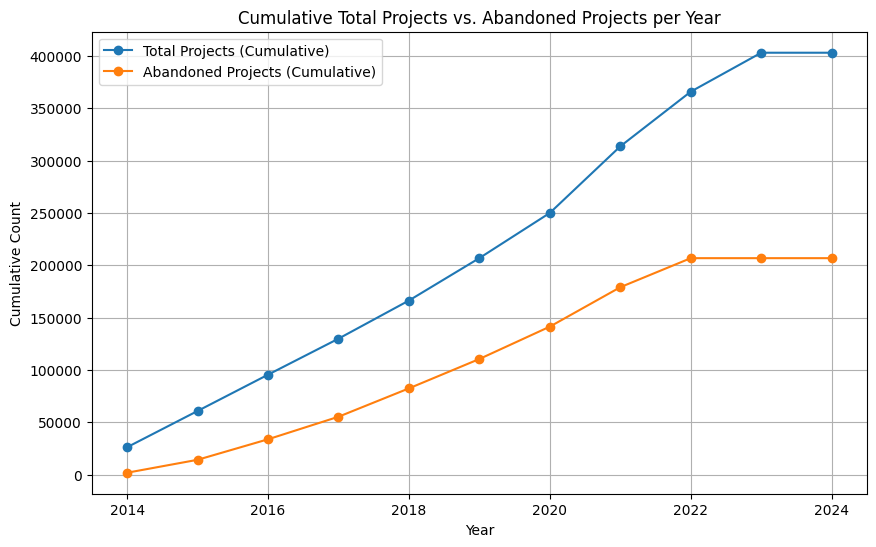

In [19]:
import matplotlib.pyplot as plt

# Plot cumulative curves for total projects and abandoned projects
plt.figure(figsize=(10, 6))

# Plot cumulative unique projects each year
plt.plot(yearly_projects_df['year'], yearly_projects_df['cumulative_unique_projects'], label='Total Projects (Cumulative)', marker='o')

# Plot cumulative abandoned projects each year
plt.plot(yearly_projects_df['year'], yearly_projects_df['cumsum_total_unique_abandoned'], label='Abandoned Projects (Cumulative)', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Total Projects vs. Abandoned Projects per Year')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Classify projects as abandoned or active
# abandoned_projects = last_release_per_project[last_release_per_project <= abandonment_cutoff].index
active_projects = last_release_per_project[last_release_per_project > abandonment_cutoff].index


In [21]:
# Filter the original dataframe to create abandoned and active project datasets
# abandoned_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(abandoned_projects)]
active_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(active_projects)]


In [22]:
abandoned_release_history

,artifact_id,release_id,release_version,release_timestamp,release_year,creation_year
0,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38,2021,2021
1,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22,2021,2021
2,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25,2021,2021
3,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11,2016,2016
4,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30,2017,2016
...,...,...,...,...,...,...
13124324,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18,2022,2021
13124325,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05,2022,2021
13124326,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11,2019,2019
13124327,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50,2019,2019


In [23]:
abandoned_release_history['artifact_id'].nunique()

206768

In [24]:
active_release_history['artifact_id'].nunique()

196280

In [25]:
# Identify the last release date per project
last_release_per_project = filtered_release_history.groupby('artifact_id')['release_timestamp'].max()
last_release_per_project

artifact_id
academy.compose.companion:multi-fab            2021-01-14 06:40:25
ae.teletronics.ejabberd:EjabberdXMLRPCClient   2017-03-14 08:38:12
ae.teletronics.nlp:categorisation              2017-01-05 08:41:51
ae.teletronics.nlp:entityextraction            2016-09-30 12:52:02
ae.teletronics.nlp:language-detector           2016-04-26 06:41:12
                                                       ...        
zone.src.sheaf:sheaf-parent                    2023-08-21 09:29:38
zone.src.sheaf:web-sheaf                       2023-08-21 12:15:54
zone.stefan.dev:geocode                        2021-01-08 17:44:45
zone.wmj:user-agent-util                       2022-06-16 07:45:05
zw.co.paynow:java-sdk                          2019-06-14 09:50:47
Name: release_timestamp, Length: 403048, dtype: datetime64[ns]

In [26]:
# Sort by artifact_id and release_timestamp to calculate intervals in both active and abandoned projects
active_release_history = active_release_history.sort_values(by=['artifact_id', 'release_timestamp'])
abandoned_release_history = abandoned_release_history.sort_values(by=['artifact_id', 'release_timestamp'])


In [27]:
active_release_history

,artifact_id,release_id,release_version,release_timestamp,release_year,creation_year
49,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.2,0.2.2,2015-05-02 01:12:05,2015,2015
50,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.3,0.2.3,2015-05-03 21:07:03,2015,2015
51,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.4,0.2.4,2016-05-04 10:51:54,2016,2015
52,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.5,0.2.5,2023-01-25 22:10:44,2023,2015
53,aero.m-click:mcpdf,aero.m-click:mcpdf:0.2.6,0.2.6,2023-01-25 22:59:18,2023,2015
...,...,...,...,...,...,...
13124306,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.2,1.0.2,2017-12-13 16:03:48,2017,2015
13124307,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.3,1.0.3,2020-10-29 22:57:17,2020,2015
13124308,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.4,1.0.4,2022-08-25 17:07:58,2022,2015
13124309,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.5,1.0.5,2022-09-17 11:27:22,2022,2015


In [28]:
import pandas as pd

# Ensure release_timestamp is in datetime format
abandoned_release_history['release_timestamp'] = pd.to_datetime(abandoned_release_history['release_timestamp'])

# Step 1: Determine first and last release dates for each project (artifact)
project_lifespans = (
    abandoned_release_history
    .sort_values('release_timestamp')
    .groupby('artifact_id')
    .agg(
        first_release_date=('release_timestamp', 'first'),
        last_release_date=('release_timestamp', 'last')
    )
    .reset_index()
)

# Calculate lifespan in days
project_lifespans['lifespan_days'] = (project_lifespans['last_release_date'] - project_lifespans['first_release_date']).dt.days

# Step 2: Segment by cohort (initial release year)
project_lifespans['cohort_year'] = project_lifespans['first_release_date'].dt.year

# Step 3: Calculate mean and median lifespan by cohort
cohort_lifespans = (
    project_lifespans
    .groupby('cohort_year')
    .agg(
        mean_lifespan_days=('lifespan_days', 'mean'),
        median_lifespan_days=('lifespan_days', 'median'),
        num_projects=('artifact_id', 'nunique')
    )
    .reset_index()
)

# Display the results
cohort_lifespans

,cohort_year,mean_lifespan_days,median_lifespan_days,num_projects
0,2014,923.245686,701.0,19122
1,2015,717.379953,478.0,27256
2,2016,627.305999,441.0,27706
3,2017,533.517398,350.0,26038
4,2018,436.410324,297.0,26016
5,2019,340.170219,243.0,25197
6,2020,252.452818,177.0,22212
7,2021,132.240827,72.0,25263
8,2022,36.917693,13.0,7958


In [29]:
project_lifespans

,artifact_id,first_release_date,last_release_date,lifespan_days,cohort_year
0,academy.compose.companion:multi-fab,2021-01-05 21:01:38,2021-01-14 06:40:25,8,2021
1,ae.teletronics.ejabberd:EjabberdXMLRPCClient,2016-10-27 04:48:11,2017-03-14 08:38:12,138,2016
2,ae.teletronics.nlp:categorisation,2016-04-11 20:23:38,2017-01-05 08:41:51,268,2016
3,ae.teletronics.nlp:entityextraction,2016-06-15 06:49:12,2016-09-30 12:52:02,107,2016
4,ae.teletronics.nlp:language-detector,2016-02-16 10:54:43,2016-04-26 06:41:12,69,2016
...,...,...,...,...,...
206763,zone.refactor.spring:hateoas,2019-10-22 05:17:14,2019-12-03 07:59:12,42,2019
206764,zone.refactor.spring:validation,2019-10-26 09:03:16,2019-11-26 20:53:27,31,2019
206765,zone.stefan.dev:geocode,2021-01-08 15:30:37,2021-01-08 17:44:45,0,2021
206766,zone.wmj:user-agent-util,2021-09-10 17:26:29,2022-06-16 07:45:05,278,2021


<Figure size 1200x600 with 0 Axes>

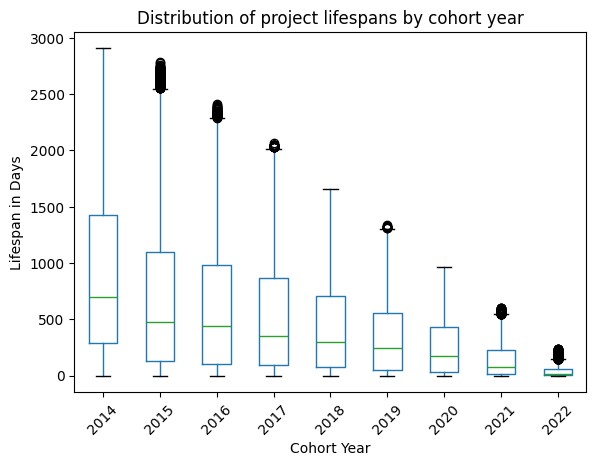

In [30]:
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of project lifespans by cohort year
plt.figure(figsize=(12, 6))
project_lifespans.boxplot(column='lifespan_days', by='cohort_year', grid=False)

plt.title('Distribution of project lifespans by cohort year')
plt.suptitle('')  # Remove the automatic title
plt.xlabel('Cohort Year')
plt.ylabel('Lifespan in Days')
plt.xticks(rotation=45)
plt.show()


In [31]:
import pandas as pd

# Ensure release_timestamp is in datetime format for both datasets
abandoned_release_history['release_timestamp'] = pd.to_datetime(abandoned_release_history['release_timestamp'])
active_release_history['release_timestamp'] = pd.to_datetime(active_release_history['release_timestamp'])

# Step 1: Determine first and last release dates for each project (artifact) in both datasets
abandoned_project_lifespans = (
    abandoned_release_history
    .sort_values('release_timestamp')
    .groupby('artifact_id')
    .agg(
        first_release_date=('release_timestamp', 'first'),
        last_release_date=('release_timestamp', 'last')
    )
    .reset_index()
)

active_project_lifespans = (
    active_release_history
    .sort_values('release_timestamp')
    .groupby('artifact_id')
    .agg(
        first_release_date=('release_timestamp', 'first'),
        last_release_date=('release_timestamp', 'last')
    )
    .reset_index()
)

# Calculate lifespan in days for both datasets
abandoned_project_lifespans['lifespan_days'] = (abandoned_project_lifespans['last_release_date'] - abandoned_project_lifespans['first_release_date']).dt.days
active_project_lifespans['lifespan_days'] = (active_project_lifespans['last_release_date'] - active_project_lifespans['first_release_date']).dt.days

# Step 2: Segment by cohort (initial release year) for both datasets
abandoned_project_lifespans['cohort_year'] = abandoned_project_lifespans['first_release_date'].dt.year
active_project_lifespans['cohort_year'] = active_project_lifespans['first_release_date'].dt.year

# Step 3: Calculate mean and median lifespan by cohort for both datasets
abandoned_cohort_lifespans = (
    abandoned_project_lifespans
    .groupby('cohort_year')
    .agg(
        mean_lifespan_days=('lifespan_days', 'mean'),
        median_lifespan_days=('lifespan_days', 'median'),
        num_projects=('artifact_id', 'nunique')
    )
    .reset_index()
)

active_cohort_lifespans = (
    active_project_lifespans
    .groupby('cohort_year')
    .agg(
        mean_lifespan_days=('lifespan_days', 'mean'),
        median_lifespan_days=('lifespan_days', 'median'),
        num_projects=('artifact_id', 'nunique')
    )
    .reset_index()
)

# Display the results for abandoned and active projects
print("Abandoned Projects:")
print(abandoned_cohort_lifespans)

print("\nActive Projects:")
print(active_cohort_lifespans)


Abandoned Projects:
   cohort_year  mean_lifespan_days  median_lifespan_days  num_projects
0         2014          923.245686                 701.0         19122
1         2015          717.379953                 478.0         27256
2         2016          627.305999                 441.0         27706
3         2017          533.517398                 350.0         26038
4         2018          436.410324                 297.0         26016
5         2019          340.170219                 243.0         25197
6         2020          252.452818                 177.0         22212
7         2021          132.240827                  72.0         25263
8         2022           36.917693                  13.0          7958

Active Projects:
   cohort_year  mean_lifespan_days  median_lifespan_days  num_projects
0         2014         3442.099062                3528.0          7036
1         2015         3147.325231                3192.0          7364
2         2016         2772.234299     

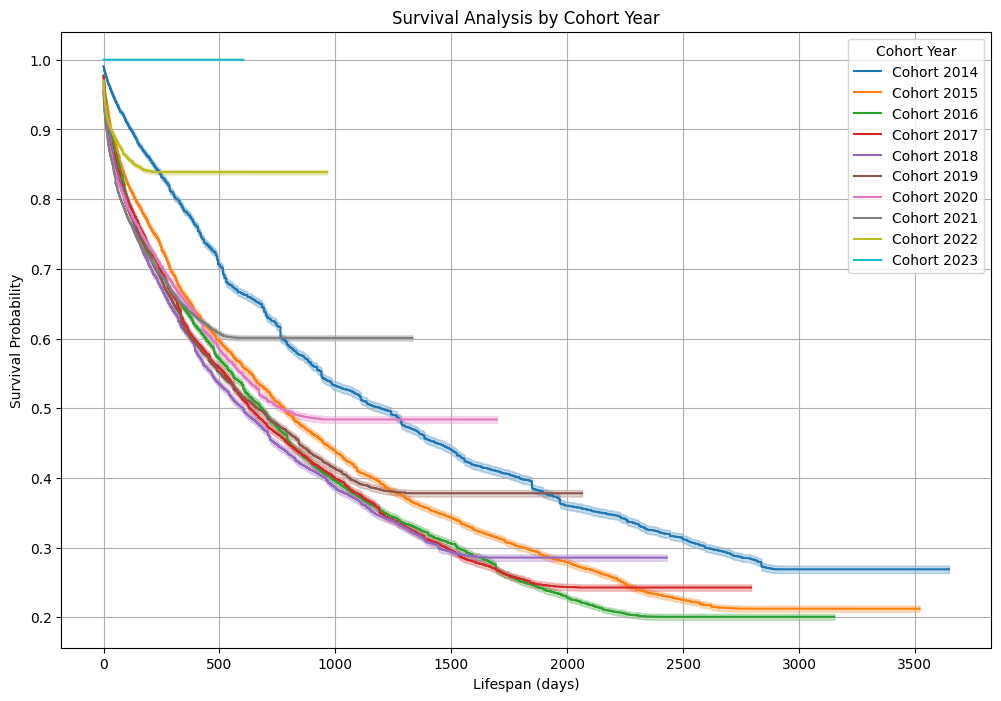

In [32]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Combine abandoned and active projects
abandoned_release_history['event_observed'] = 1  # Abandoned projects
active_release_history['event_observed'] = 0    # Active projects (censored)

combined_data = pd.concat([abandoned_release_history, active_release_history], ignore_index=True)

# Ensure release_timestamp is in datetime format
combined_data['release_timestamp'] = pd.to_datetime(combined_data['release_timestamp'])

# Calculate lifespan days for each project
project_lifespans = (
    combined_data
    .sort_values('release_timestamp')
    .groupby('artifact_id')
    .agg(
        first_release_date=('release_timestamp', 'first'),
        last_release_date=('release_timestamp', 'last'),
        event_observed=('event_observed', 'max')  # Keep 1 for abandoned, 0 for active
    )
    .reset_index()
)

project_lifespans['lifespan_days'] = (project_lifespans['last_release_date'] - project_lifespans['first_release_date']).dt.days
project_lifespans['cohort_year'] = project_lifespans['first_release_date'].dt.year

# Perform Survival Analysis
kmf = KaplanMeierFitter()

# Plot survival curves for each cohort
plt.figure(figsize=(12, 8))
for cohort_year, group in project_lifespans.groupby('cohort_year'):
    kmf.fit(group['lifespan_days'], group['event_observed'], label=f'Cohort {cohort_year}')
    kmf.plot_survival_function()

plt.title('Survival Analysis by Cohort Year')
plt.xlabel('Lifespan (days)')
plt.ylabel('Survival Probability')
plt.legend(title='Cohort Year')
plt.grid(True)
plt.show()


In [33]:
from lifelines import KaplanMeierFitter
import pandas as pd

# Initialize an empty list to store stats for each cohort
survival_stats_list = []

# Perform Kaplan-Meier fitting and extract stats for each cohort
for cohort_year, group in project_lifespans.groupby('cohort_year'):
    kmf = KaplanMeierFitter()
    
    # Fit the Kaplan-Meier model
    kmf.fit(durations=group['lifespan_days'], event_observed=group['event_observed'])
    
    # Extract statistics for the cohort
    cohort_stats = {
        'cohort_year': cohort_year,
        'median_survival_time': kmf.median_survival_time_,  # Median survival time
        'survival_at_1_year': kmf.survival_function_at_times([365]).values[0],  # Survival probability at 1 year
        'survival_at_2_years': kmf.survival_function_at_times([730]).values[0],  # Survival probability at 2 years
        'survival_at_5_years': kmf.survival_function_at_times([1825]).values[0],  # Survival probability at 5 years
        'num_projects': len(group)  # Number of projects in the cohort
    }
    
    # Append to the survival_stats_list
    survival_stats_list.append(cohort_stats)

# Convert the list of dictionaries to a DataFrame
survival_stats = pd.DataFrame(survival_stats_list)

# Display the survival stats DataFrame
survival_stats

,cohort_year,median_survival_time,survival_at_1_year,survival_at_2_years,survival_at_5_years,num_projects
0,2014,1195.0,0.778194,0.625162,0.397240,26158
1,2015,776.0,0.654419,0.515222,0.298729,34620
2,2016,682.0,0.634862,0.479614,0.248904,34680
3,2017,630.0,0.611190,0.467665,0.252983,34405
4,2018,601.0,0.604967,0.452003,0.285626,36440
5,2019,663.0,0.606535,0.480986,0.378027,40550
6,2020,761.0,0.648706,0.507862,0.483807,43149
7,2021,inf,0.640166,0.600889,0.600889,63612
8,2022,inf,0.838685,0.838685,0.838685,52235
9,2023,inf,1.000000,1.000000,1.000000,37199


In [34]:
from lifelines import KaplanMeierFitter
import pandas as pd

# Prepare a DataFrame to store hazard rates for all cohorts
hazard_rates = []

# Loop through each cohort and compute hazard rates
for cohort_year, group in project_lifespans.groupby('cohort_year'):
    kmf = KaplanMeierFitter()
    
    # Fit the Kaplan-Meier estimator
    kmf.fit(durations=group['lifespan_days'], event_observed=group['event_observed'])
    
    # Extract survival function and event table
    survival_function = kmf.survival_function_
    event_table = kmf.event_table
    
    # Compute hazard rates (approximation)
    event_table['hazard_rate'] = event_table['observed'] / event_table['at_risk']
    event_table['cohort_year'] = cohort_year
    
    # Append results
    hazard_rates.append(event_table[['cohort_year', 'at_risk', 'observed', 'hazard_rate']].reset_index())

# Concatenate hazard rates into a single DataFrame
hazard_rates_df = pd.concat(hazard_rates, ignore_index=True)

# Display the hazard rates DataFrame
hazard_rates_df.head()


,event_at,cohort_year,at_risk,observed,hazard_rate
0,0.0,2014,26158,243,0.009290
1,1.0,2014,25915,63,0.002431
2,2.0,2014,25852,45,0.001741
3,3.0,2014,25807,30,0.001162
4,4.0,2014,25777,60,0.002328


In [35]:
hazard_rates_df

,event_at,cohort_year,at_risk,observed,hazard_rate
0,0.0,2014,26158,243,0.009290
1,1.0,2014,25915,63,0.002431
2,2.0,2014,25852,45,0.001741
3,3.0,2014,25807,30,0.001162
4,4.0,2014,25777,60,0.002328
...,...,...,...,...,...
20593,599.0,2023,10,0,0.000000
20594,600.0,2023,8,0,0.000000
20595,601.0,2023,5,0,0.000000
20596,602.0,2023,2,0,0.000000


In [36]:
combined_data

,artifact_id,release_id,release_version,release_timestamp,release_year,creation_year,event_observed
0,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38,2021,2021,1
1,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22,2021,2021,1
2,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25,2021,2021,1
3,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11,2016,2016,1
4,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30,2017,2016,1
...,...,...,...,...,...,...,...
13124324,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.2,1.0.2,2017-12-13 16:03:48,2017,2015,0
13124325,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.3,1.0.3,2020-10-29 22:57:17,2020,2015,0
13124326,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.4,1.0.4,2022-08-25 17:07:58,2022,2015,0
13124327,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.5,1.0.5,2022-09-17 11:27:22,2022,2015,0
